# **BACE1_Regression_Random_Forest**

- Building a regression model of acetylcholinesterase inhibitors using the random forest algorithm

## **1. Import libraries**

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


## **2. Load the dataset**

In [28]:
df = pd.read_csv('BACE1_bioactivity_final_df_with_fp.csv')

df

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Name.1,pIC50
0,CHEMBL78946,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CHEMBL406146,6.384050
1,CHEMBL406146,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CHEMBL78946,8.698970
2,CHEMBL324109,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CHEMBL324109,6.337242
3,CHEMBL116826,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CHEMBL116826,4.468521
4,CHEMBL332948,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CHEMBL143239,7.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5942,CHEMBL5188873,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CHEMBL5188873,6.467246
5943,CHEMBL5192597,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CHEMBL5192597,6.110698
5944,CHEMBL5220695,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CHEMBL5184529,6.081970
5945,CHEMBL5219239,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CHEMBL5220695,7.821023


- here we see that, we expected 882 features including pIC50 but got 884. So we should further explore the dataset as we may have commited mistake while saving the df in previous notebooks.

In [29]:
df.columns

Index(['Name', 'PubchemFP0', 'PubchemFP1', 'PubchemFP2', 'PubchemFP3',
       'PubchemFP4', 'PubchemFP5', 'PubchemFP6', 'PubchemFP7', 'PubchemFP8',
       ...
       'PubchemFP873', 'PubchemFP874', 'PubchemFP875', 'PubchemFP876',
       'PubchemFP877', 'PubchemFP878', 'PubchemFP879', 'PubchemFP880',
       'Name.1', 'pIC50'],
      dtype='object', length=884)

- we have "Name" & "Name.1" are irrelavant columns for model building. I retained chembl ids so that in later stage we can identify the molecules. but for now, we can drop these columns

In [30]:
#drop "Name" column
df.drop(columns=["Name", "Name.1"], inplace=True)


In [31]:
df.shape

(5947, 882)

## **3. Input features**

-The **BACE1** data set contains 881 input features and 1 output variable (pIC50 values).



### **3.1. Input features**

In [32]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5942,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5943,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5944,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5945,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [33]:
y = df["pIC50"]
y

0       6.384050
1       8.698970
2       6.337242
3       4.468521
4       7.698970
          ...   
5942    6.467246
5943    6.110698
5944    6.081970
5945    7.821023
5946    7.812479
Name: pIC50, Length: 5947, dtype: float64

In [34]:
df["pIC50"].min()

1.0655015487564323

In [35]:
df["pIC50"].max()

12.69897000433602

### **3.3. Let's examine the data dimension**

In [36]:
X.shape

(5947, 881)

In [37]:
y.shape

(5947,)

### **3.4. Remove low variance features**

In [38]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [39]:
X.shape

(5947, 161)

## **4. Data split (80/20 ratio)**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [41]:
X_train.shape, y_train.shape

((4757, 161), (4757,))

In [42]:
X_test.shape, y_test.shape

((1190, 161), (1190,))

## **5. Building a Regression Model using Random Forest**

In [43]:
# Model Selection: Choose Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Model Training: Train the Random Forest model on the training data
model.fit(X_train, y_train)

# Model Evaluation: Make predictions on the testing set and evaluate performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.94247087125575
Root Mean Squared Error: 0.970809389764927
R-squared: 0.5855880236241398


- An R-squared of 0.5856 indicates that the model is capturing some of the variance in the pIC50 values, but there is still room for improvement

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**


In [44]:

# Create a DataFrame to hold the experimental and predicted pIC50 values
results_df = pd.DataFrame({'Experimental_pIC50': y_test, 'Predicted_pIC50': y_pred})


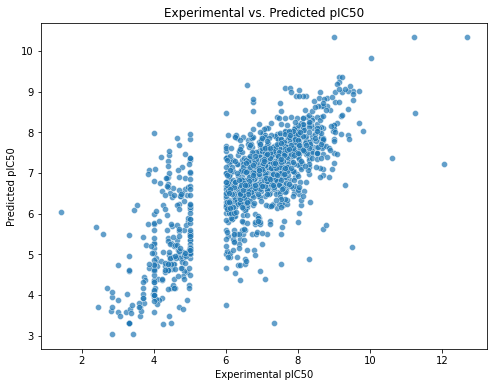

In [45]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Experimental_pIC50', y='Predicted_pIC50', data=results_df, alpha=0.7)
plt.xlabel('Experimental pIC50')
plt.ylabel('Predicted pIC50')
plt.title('Experimental vs. Predicted pIC50')
plt.show()

- its strange that in our dataset we don't have pIC50 values around 5.6 to 5.9(approx.)

## 7. Hyperparameter Optimization

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define your model
model = RandomForestRegressor()

# Define the hyperparameters and their possible values
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 5, 10, 20, 50, 100],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Create the Random Search object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=2)

# Fit the Random Search to your data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.4min finished


In [47]:
print(best_params)

{'max_depth': 100, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 904}


In [49]:
best_model

RandomForestRegressor(max_depth=100, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=904)

### **7.1. Evaluate the Best Model:**
- Use the best model obtained from RandomizedSearchCV and evaluate it on test set. This will give an unbiased estimate of the model's performance on unseen data. We'll use metrics such as mean squared error (MSE), mean absolute error (MAE), and R-squared to assess the model's performance.

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Assuming you have the training data (X_train and y_train) and the test data (X_test and y_test)

# Create and fit the model
best_model = RandomForestRegressor(max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=904)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print("Evaluation Metrics for the Updated Best Model:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r_squared)


Evaluation Metrics for the Updated Best Model:
Mean Squared Error (MSE): 0.9137319055738878
Mean Absolute Error (MAE): 0.6912804155345285
R-squared: 0.5982247765790082


- we see slight improvememnt in R-squared

### **Visualizing the model's predictions**

#### **Scatter Plot**

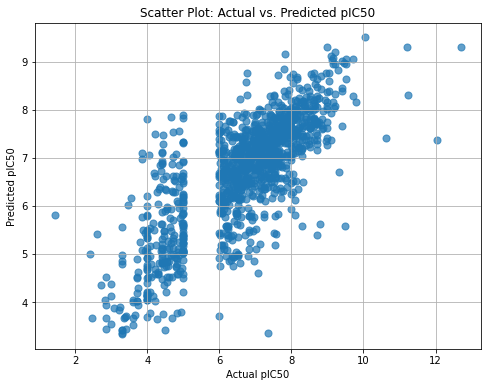

In [61]:
# Scatter plot to compare predicted values with actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, s=50, alpha=0.7)
plt.xlabel('Actual pIC50')
plt.ylabel('Predicted pIC50')
plt.title('Scatter Plot: Actual vs. Predicted pIC50')
plt.grid(True)
plt.show()




#### **Residual plot**

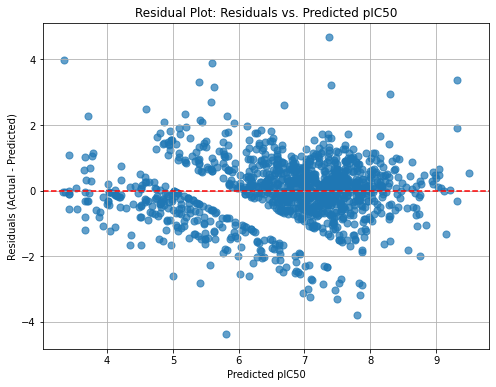

In [62]:
# Residual plot to visualize the differences between predicted and actual values
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, s=50, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted pIC50')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot: Residuals vs. Predicted pIC50')
plt.grid(True)
plt.show()